In [68]:
%matplotlib widget

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import yfinance as yf
# import talib as ta
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scipy.signal import savgol_filter
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import tqdm
import pickle

tqdm.tqdm.pandas()

plt.style.use('seaborn-v0_8-muted')


In [69]:
symbols = [
    'MSFT', 'AAPL', 'NVDA', 'AMZN', 'META', 'GOOGL', 'GOOG', 'LLY', 'JPM',
    'AVGO', 'XOM', 'UNH', 'V', 'TSLA', 'PG', 'MA', 'JNJ', 'HD', 'MRK',
    'COST', 'ABBV', 'CVX', 'CRM', 'BAC', 'WMT', 'NFLX', 'PEP', 'AMD', 'KO',
    'WFC', 'LIN', 'TMO', 'ADBE', 'DIS', 'ACN', 'MCD', 'CSCO', 'ABT', 'ORCL',
    'CAT', 'QCOM', 'INTU', 'GE', 'IBM', 'VZ', 'CMCSA', 'DHR', 'AMAT', 'COP',
    'TXN', 'PM', 'NOW', 'PFE', 'AMGN', 'INTC', 'UNP', 'UBER', 'LOW', 'GS',
    'NEE', 'RTX', 'AXP', 'SPGI', 'ISRG', 'HON', 'PGR', 'ELV', 'MU', 'BKNG',
    'ETN', 'C', 'T', 'MS', 'LRCX', 'NKE', 'SCHW', 'TJX', 'SYK', 'DE',
    'MDT', 'UPS', 'BLK', 'VRTX', 'CB', 'LMT', 'BMY', 'CI', 'SBUX', 'ADP',
    'BSX', 'MMC', 'PLD', 'BA', 'REGN', 'ADI', 'MDLZ', 'CVS', 'FI', 'BX',
    'PANW', 'KLAC', 'GILD', 'TMUS', 'SNPS', 'AMT', 'CMG', 'SO', 'DUK', 'CME',
    'TGT', 'ICE', 'MO', 'EOG', 'WM', 'CDNS', 'FCX', 'SLB', 'SHW', 'CL',
    'MPC', 'EQIX', 'TT', 'ABNB', 'NOC', 'CSX', 'GD', 'MCK', 'TDG', 'PYPL',
    'ITW', 'PSX', 'ZTS', 'APH', 'PH', 'BDX', 'EMR', 'FDX', 'HCA', 'ORLY',
    'PNC', 'AON', 'ANET', 'USB', 'CTAS', 'ROP', 'PCAR', 'MAR', 'MCO', 'MSI',
    'CEG', 'ECL', 'NXPI', 'VLO', 'NSC', 'COF', 'WELL', 'DXCM', 'APD', 'AJG',
    'TRV', 'MMM', 'TFC', 'AZO', 'HLT', 'EW', 'GM', 'AIG', 'F', 'ALL',
    'AEP', 'CPRT', 'ROST', 'NUE', 'ADSK', 'SPG', 'OKE', 'WMB', 'CARR', 'TEL',
    'MCHP', 'SRE', 'AFL', 'O', 'KMB', 'DHI', 'PSA', 'CCI', 'NEM', 'FTNT',
    'BK', 'GWW', 'CNC', 'MSCI', 'LULU', 'MET', 'D', 'HES', 'GIS', 'OXY',
    'DLR', 'FIS', 'STZ', 'PRU', 'AMP', 'AME', 'JCI', 'URI', 'IQV', 'COR',
    'IR', 'PCG', 'DOW', 'CMI', 'PAYX', 'GEV', 'LEN', 'FAST', 'A', 'FANG',
    'LHX', 'IDXX', 'CTVA', 'MNST', 'EXC', 'RSG', 'SMCI', 'HUM', 'KR', 'OTIS',
    'SYY', 'ODFL', 'MLM', 'YUM', 'KMI', 'KDP', 'CSGP', 'DVN', 'HAL', 'EL',
    'GPN', 'PEG', 'ACGL', 'VRSK', 'VMC', 'ADM', 'BKR', 'CTSH', 'DFS', 'KVUE',
    'CDW', 'PWR', 'IT', 'GEHC', 'DD', 'MRNA', 'ED', 'DG', 'ANSS', 'DAL',
    'BIIB', 'PPG', 'FICO', 'XEL', 'HSY', 'FTV', 'HIG', 'KHC', 'ROK', 'XYL',
    'WST', 'EA', 'MPWR', 'EXR', 'RCL', 'VICI', 'VST', 'TSCO', 'NVR', 'TRGP',
    'CHTR', 'PHM', 'RJF', 'ON', 'KEYS', 'CAH', 'LYB', 'RMD', 'GLW', 'AVB',
    'HWM', 'ZBH', 'FITB', 'WTW', 'DLTR', 'HPQ', 'EIX', 'MTD', 'EFX', 'WEC',
    'CBRE', 'CHD', 'DOV', 'TROW', 'EBAY', 'NDAQ', 'MTB', 'WAB', 'FE', 'PTC',
    'AWK', 'ALGN', 'WY', 'HPE', 'GRMN', 'CBOE', 'HBAN', 'ULTA', 'AEE', 'BRO',
    'NTAP', 'STT', 'HUBB', 'IRM', 'STLD', 'TDY', 'ES', 'BR', 'TTWO', 'APTV',
    'IFF', 'VLTO', 'CINF', 'EQR', 'ETR', 'PPL', 'AXON', 'GPC', 'STE', 'BAX',
    'BALL', 'DECK', 'WDC', 'DTE', 'INVH', 'MOH', 'CPAY', 'CTRA', 'SBAC', 'BLDR',
    'WBD', 'LUV', 'TSN', 'HOLX', 'LH', 'CLX', 'FSLR', 'CF', 'CMS', 'OMC',
    'CAG', 'SWKS', 'PFG', 'DPZ', 'EXPE', 'RF', 'ATO', 'CNP', 'PKG', 'BG',
    'TER', 'TXT', 'DRI', 'EG', 'MAS', 'ILMN', 'EQT', 'J', 'K', 'MAA',
    'AVY', 'IEX', 'STX', 'LDOS', 'JBL', 'VRSN', 'ARE', 'MKC', 'EXPD', 'AKAM',
    'UAL', 'WRB', 'MRO', 'CE', 'TYL', 'NRG', 'FDS', 'COO', 'VTR', 'ENPH',
    'LVS', 'SYF', 'CFG', 'WAT', 'NTRS', 'ESS', 'POOL', 'EVRG', 'JBHT', 'PNR',
    'ALB', 'SNA', 'ZBRA', 'SJM', 'EMN', 'IP', 'HST', 'HII', 'CCL', 'WRK',
    'AMCR', 'FFIV', 'LKQ', 'GEN', 'UDR', 'DGX', 'LNT', 'JKHY', 'SWK', 'AES',
    'VTRS', 'MGM', 'KEY', 'LYV', 'NDSN', 'PODD', 'TAP', 'EPAM', 'IPG', 'RVTY',
    'KMX', 'ALLE', 'NI', 'WBA', 'DOC', 'TRMB', 'L', 'KIM', 'AOS', 'CRL',
    'LW', 'BBY', 'ROL', 'JNPR', 'FMC', 'REG', 'PNW', 'AAL', 'HRL', 'RHI',
    'APA', 'BBWI', 'FRT', 'CHRW', 'DVA', 'CTLT', 'IVZ', 'HAS', 'BWA', 'BEN',
    'MTCH', 'CZR', 'SOLV', 'WYNN', 'DAY', 'NWSA', 'CPB', 'INCY', 'TPR', 'FOXA',
    'BF.B', 'TFX', 'QRVO', 'BXP', 'CPT', 'AIZ', 'ETSY', 'CMA', 'RL', 'HSIC',
    'MKTX', 'PAYC', 'MOS', 'TECH', 'NCLH', 'GNRC', 'UHS', 'NWS', 'PARA', 'FOX',
    'GL', 'MHK', 'BIO'
]

In [72]:
# Load singular stock 
# 
start_date = '1800-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')
symbol = "AAPL"

if not os.path.isfile(f'Stocks/{symbol}.csv'):
    data = yf.download(symbol, start=start_date, end=end_date)
    data.columns = data.columns.droplevel(1)

#Removing index error
    data.reset_index(inplace=True)
    data.to_csv(f'Stocks/temp.csv', index=False)
    data = pd.read_csv(f'Stocks/temp.csv')
    data.reset_index(inplace=True)
    data.drop(columns = ['Close', 'High', 'Low', 'Open', 'Volume'], inplace = True)
    data.to_csv(f'Stocks/{symbol}.csv', index=False)


else:
    data = pd.read_csv(f'Stocks/{symbol}.csv')


In [234]:
stocks = symbols[:500]

start_date = '1800-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

datas = {}

for stock in stocks:
    # if not os.path.isfile(f'Stocks/{stock}.csv'):
    if True:
        data = yf.download(stock, start=start_date, end=end_date, progress=False)
        data.columns = data.columns.droplevel(1)

        #Removing index error
        data.reset_index(inplace=True)
        data.to_csv(f'Stocks/temp.csv', index=False)
        data = pd.read_csv(f'Stocks/temp.csv')
        data.reset_index(inplace=True)
        data.drop(columns = ['Close', 'High', 'Low', 'Open', 'Volume'], inplace = True)
        data.to_csv(f'Stocks/{stock}.csv', index=False)
        data.drop(columns = ['index'], inplace = True)
        datas[stock] = data
    else:
        data = pd.read_csv(f'Stocks/{stock}.csv')
        data.drop(columns = ['index'], inplace = True)
        datas[stock] = data

data = datas['MSFT']
for stock in stocks[1:]:
    data = data.merge(datas[stock], on='Date', how='outer', suffixes=('', f'_{stock}'))

data.rename(columns={'Adj Close': 'Adj Close_MSFT'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])


1 Failed download:
['WRK']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')

1 Failed download:
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 1800-01-01 -> 2024-12-05) (Yahoo error = "1d data not available for startTime=-5364644640 and endTime=1733374800. Only 100 years worth of day granularity data are allowed to be fetched per request.")')


In [73]:
data

,index,Date,Adj Close
0,0,1980-12-12,0.098835
1,1,1980-12-15,0.093678
2,2,1980-12-16,0.086802
3,3,1980-12-17,0.088951
4,4,1980-12-18,0.091530
...,...,...,...
11082,11082,2024-11-27,234.929993
11083,11083,2024-11-29,237.330002
11084,11084,2024-12-02,239.589996
11085,11085,2024-12-03,242.649994


In [246]:
with open('data.pickle', 'wb') as f:
    pickle.dump(data, f)

data = pd.read_pickle('data.pickle')

In [248]:
stocks = [col[10:] for col in data.columns[1:]]
stock_prices = [data[['Date', f'Adj Close_{stock}']].rename(columns={f'Adj Close_{stock}': 'Adj Close'}).dropna().reset_index(drop=True).reset_index() for stock in stocks]
datas = pd.Series(stock_prices, stocks)
datas = datas.to_frame().reset_index().rename(columns={'index': 'Stock', 0: 'Data'})
# data = datas['Data'].iloc[2].copy()

In [2]:
# with open('data.pickle', 'wb') as f:
#     pickle.dump(datas, f)

datas = pd.read_pickle('data.pickle')

In [135]:
Accuracies = {}

def func(stock, df, thresholds):
    data = df.copy()
    window_length = 5  # Number of preceding points to use (must be less than len(data))
    poly_order = 3  # Polynomial order to fit

    for windown_length in [5, 10, 15, 20, 25, 30]:
        threshold = 0.01

        # try:
        predicted_values_polyfit = []
        predicted_values_savgol = []

        for i in range(window_length, len(data)):
            # Get the preceding 'window_length' values
            x = np.array(data['index'][i-window_length:i])
            y = np.array(data['Adj Close'][i-window_length:i])

            # Predict with a polynomial fit
            coeffs = np.polyfit(x, y, poly_order)
            poly = np.poly1d(coeffs)
            next_value = poly(data['index'][i])
            predicted_values_polyfit.append(next_value)

            # Predict with a Savitzky-Golay filter
            weights = np.exp(-0.5 * (np.linspace(-1, 0, window_length) ** 2))
            weights /= weights.sum()
            coeffs = np.polyfit(x, y, poly_order, w=weights)
            poly = np.poly1d(coeffs)
            next_value = poly(data['index'][i])
            predicted_values_savgol.append(next_value)

        predicted_values_polyfit = [np.nan] * window_length + predicted_values_polyfit
        predicted_values_savgol = [np.nan] * window_length + predicted_values_savgol

        # print(f'{stock} predictions:')

        data['Predicted Adj Close Polyfit'] = predicted_values_polyfit
        data['Predicted Adj Close Savgol'] = predicted_values_savgol
        # data['Predicted Adj Close Savgol'] = savgol_filter(data['Predicted Adj Close Savgol'], window_length=11, polyorder=2)

        # threshold = 0.01

        data['Adj Close Old'] = data['Adj Close'].shift(1)
        data['Predicted Adj Close Savgol Old'] = data['Predicted Adj Close Savgol'].shift(1)
        data['Predicted Adj Close Polyfit Old'] = data['Predicted Adj Close Polyfit'].shift(1)

        data['reality \% change'] = (data['Adj Close'] - data['Adj Close Old']) / data['Adj Close Old']


        # data['reality'] = (data['Adj Close'] - data['Adj Close Old']).apply(lambda x: -1 if x < 0 else 1)

        # data['savgol prediction (sav vs real)'] = (data['Predicted Adj Close Savgol'] - data['Adj Close Old']).apply(lambda x: -1 if x < 0 else 1)

        data['savgol prediction (sav vs real)'] = ((data['Predicted Adj Close Savgol'] - data['Adj Close Old'])/data['Adj Close Old'])
        data['savgol prediction (sav vs sav)'] = ((data['Predicted Adj Close Savgol'] - data['Predicted Adj Close Savgol Old'])/data['Predicted Adj Close Savgol Old'])

        # data['reality'] = data['reality \% change'].apply(lambda x: -1 if x < -threshold else 1 if x > threshold else 0)
        # data['savgol prediction (sav vs real)'] = data['savgol prediction (sav vs real)'].apply(lambda x: -1 if x < -threshold else 1 if x > threshold else 0)
        # data['savgol prediction (sav vs sav)'] = data['savgol prediction (sav vs sav)'].apply(lambda x: -1 if x < -threshold else 1 if x > threshold else 0)

        data['reality'] = data['reality \% change'].apply(lambda x: -1 if x < 0 else 1)
        data['savgol prediction (sav vs real)'] = data['savgol prediction (sav vs real)'].apply(lambda x: -1 if x < 0 else 1)
        data['savgol prediction (sav vs sav)'] = data['savgol prediction (sav vs sav)'].apply(lambda x: -1 if x < 0 else 1)


        data['polyfit prediction'] = (data['Predicted Adj Close Polyfit'] - data['Adj Close Old']).apply(lambda x: -1 if x < 0 else 1)

        # data['savgol prediction (sav vs sav)'] = (data['Predicted Adj Close Savgol'] - data['Predicted Adj Close Savgol Old']).apply(lambda x: -1 if x < 0 else 1)

        # print('Savgol (sav vs real) predictions:', end = ' ')
        # gg, string = (data['reality'] == data['savgol prediction (sav vs real)']).value_counts(), ''
        # for id in gg.index: string += f"{gg.loc[id]} {id} "
        # print(string)

        # print('Savgol (sav vs sav) predictions:', end = ' ')
        # gg, string = (data['reality'] == data['savgol prediction (sav vs sav)']).value_counts(), ''
        # for id in gg.index: string += f"{gg.loc[id]} {id} "
        # print(string)

        # print('Polyfit predictions:', end = ' ')
        # gg, string = (data['reality'] == data['polyfit prediction']).value_counts(), ''
        # for id in gg.index: string += f"{gg.loc[id]} {id} "
        # print(string)

        # print('Savgol Confusion matrix:')
        # print(confusion_matrix(data['reality'], data['savgol prediction (sav vs real)']))


        print(f'Threshold: {threshold * 100}%')        
        print(f'confusion_matrix for (sav vs real) {stock}:')
        conf = (confusion_matrix(data['reality'], data['savgol prediction (sav vs real)']))

        # Extract the four corner values and form a 2x2 matrix
        corner_values = np.array([[conf[0, 0], conf[0, -1]],
                                [conf[-1, 0], conf[-1, -1]]])
        
        print(conf)
        
        diagonal_sum = np.trace(corner_values)

        # Calculate the total sum of all elements in the confusion matrix
        total_sum = np.sum(corner_values)

        # Calculate accuracy
        acc = diagonal_sum / total_sum
        print(f'Accuracy for (sav vs real) {stock}:', acc)

        normalized_corner_values = corner_values / corner_values[0, 0]

        print(normalized_corner_values)
        print()


        # except:
        #     acc = 0
        # # print(f'Accuracy for {stock}:', acc)
        # Accuracies[stock] = acc

    # print('Precision:', precision_score(data['reality'], data['savgol prediction (sav vs real)'], average='weighted', zero_division=0))
    # print('Recall:', recall_score(data['reality'], data['savgol prediction (sav vs real)'], average='weighted', zero_division=0))
    # print('F1 Score:', f1_score(data['reality'], data['savgol prediction (sav vs real)'], average='weighted', zero_division=0))

    # print()

conf = func('AAPL', data, thresholds=[0])

Threshold: 1.0%
confusion_matrix for (sav vs real) AAPL:
[[2637 2547]
 [2885 3018]]
Accuracy for (sav vs real) AAPL: 0.5100568233065753
[[1.         0.96587031]
 [1.09404626 1.14448237]]

Threshold: 1.0%
confusion_matrix for (sav vs real) AAPL:
[[2637 2547]
 [2885 3018]]
Accuracy for (sav vs real) AAPL: 0.5100568233065753
[[1.         0.96587031]
 [1.09404626 1.14448237]]

Threshold: 1.0%
confusion_matrix for (sav vs real) AAPL:
[[2637 2547]
 [2885 3018]]
Accuracy for (sav vs real) AAPL: 0.5100568233065753
[[1.         0.96587031]
 [1.09404626 1.14448237]]

Threshold: 1.0%
confusion_matrix for (sav vs real) AAPL:
[[2637 2547]
 [2885 3018]]
Accuracy for (sav vs real) AAPL: 0.5100568233065753
[[1.         0.96587031]
 [1.09404626 1.14448237]]

Threshold: 1.0%
confusion_matrix for (sav vs real) AAPL:
[[2637 2547]
 [2885 3018]]
Accuracy for (sav vs real) AAPL: 0.5100568233065753
[[1.         0.96587031]
 [1.09404626 1.14448237]]

Threshold: 1.0%
confusion_matrix for (sav vs real) AAPL:
[[2

In [126]:
Accuracies = {}

def func(stock, df, thresholds):
    data = df.copy()
    window_length = 11  # Number of preceding points to use (must be less than len(data))
    poly_order = 3  # Polynomial order to fit

    for threshold in thresholds:

        # try:
        predicted_values_polyfit = []
        predicted_values_savgol = []

        for i in range(window_length, len(data)):
            # Get the preceding 'window_length' values
            x = np.array(data['index'][i-window_length:i])
            y = np.array(data['Adj Close'][i-window_length:i])

            # Predict with a polynomial fit
            coeffs = np.polyfit(x, y, poly_order)
            poly = np.poly1d(coeffs)
            next_value = poly(data['index'][i])
            predicted_values_polyfit.append(next_value)

            # Predict with a Savitzky-Golay filter
            weights = np.exp(-0.5 * (np.linspace(-1, 0, window_length) ** 2))
            weights /= weights.sum()
            coeffs = np.polyfit(x, y, poly_order, w=weights)
            poly = np.poly1d(coeffs)
            next_value = poly(data['index'][i])
            predicted_values_savgol.append(next_value)

        predicted_values_polyfit = [np.nan] * window_length + predicted_values_polyfit
        predicted_values_savgol = [np.nan] * window_length + predicted_values_savgol

        # print(f'{stock} predictions:')

        data['Predicted Adj Close Polyfit'] = predicted_values_polyfit
        data['Predicted Adj Close Savgol'] = predicted_values_savgol
        # data['Predicted Adj Close Savgol'] = savgol_filter(data['Predicted Adj Close Savgol'], window_length=11, polyorder=2)

        # threshold = 0.01

        data['Adj Close Old'] = data['Adj Close'].shift(1)
        data['Predicted Adj Close Savgol Old'] = data['Predicted Adj Close Savgol'].shift(1)
        data['Predicted Adj Close Polyfit Old'] = data['Predicted Adj Close Polyfit'].shift(1)

        data['reality \% change'] = (data['Adj Close'] - data['Adj Close Old']) / data['Adj Close Old']

        data['reality'] = data['reality \% change'].apply(lambda x: -1 if x < -threshold else 1 if x > threshold else 0)

        # data['reality'] = (data['Adj Close'] - data['Adj Close Old']).apply(lambda x: -1 if x < 0 else 1)

        # data['savgol prediction (sav vs real)'] = (data['Predicted Adj Close Savgol'] - data['Adj Close Old']).apply(lambda x: -1 if x < 0 else 1)

        data['savgol prediction (sav vs real)'] = ((data['Predicted Adj Close Savgol'] - data['Adj Close Old'])/data['Adj Close Old'])
        data['savgol prediction (sav vs sav)'] = ((data['Predicted Adj Close Savgol'] - data['Predicted Adj Close Savgol Old'])/data['Predicted Adj Close Savgol Old'])

        data['savgol prediction (sav vs real)'] = data['savgol prediction (sav vs real)'].apply(lambda x: -1 if x < -threshold else 1 if x > threshold else 0)
        data['savgol prediction (sav vs sav)'] = data['savgol prediction (sav vs sav)'].apply(lambda x: -1 if x < -threshold else 1 if x > threshold else 0)


        data['polyfit prediction'] = (data['Predicted Adj Close Polyfit'] - data['Adj Close Old']).apply(lambda x: -1 if x < 0 else 1)

        # data['savgol prediction (sav vs sav)'] = (data['Predicted Adj Close Savgol'] - data['Predicted Adj Close Savgol Old']).apply(lambda x: -1 if x < 0 else 1)

        # print('Savgol (sav vs real) predictions:', end = ' ')
        # gg, string = (data['reality'] == data['savgol prediction (sav vs real)']).value_counts(), ''
        # for id in gg.index: string += f"{gg.loc[id]} {id} "
        # print(string)

        # print('Savgol (sav vs sav) predictions:', end = ' ')
        # gg, string = (data['reality'] == data['savgol prediction (sav vs sav)']).value_counts(), ''
        # for id in gg.index: string += f"{gg.loc[id]} {id} "
        # print(string)

        # print('Polyfit predictions:', end = ' ')
        # gg, string = (data['reality'] == data['polyfit prediction']).value_counts(), ''
        # for id in gg.index: string += f"{gg.loc[id]} {id} "
        # print(string)

        # print('Savgol Confusion matrix:')
        # print(confusion_matrix(data['reality'], data['savgol prediction (sav vs real)']))


        print(f'Threshold: {threshold * 100}%')        
        print(f'confusion_matrix for (sav vs real) {stock}:')
        conf = (confusion_matrix(data['reality'], data['savgol prediction (sav vs real)']))


        print('Accuracy:', round(accuracy_score(data['reality'], data['savgol prediction (sav vs real)']), 3))
        print('Precision:', round(precision_score(data['reality'], data['savgol prediction (sav vs real)'], average='weighted', zero_division=0), 3))
        print('Recall:', round(recall_score(data['reality'], data['savgol prediction (sav vs real)'], average='weighted', zero_division=0), 3))
        print('F1 Score:', round(f1_score(data['reality'], data['savgol prediction (sav vs real)'], average='weighted', zero_division=0), 3))

        # Extract the four corner values and form a 2x2 matrix
        corner_values = np.array([[conf[0, 0], conf[0, -1]],
                                [conf[-1, 0], conf[-1, -1]]])
        
        diagonal_sum = np.trace(conf)

        # Calculate the total sum of all elements in the confusion matrix
        total_sum = np.sum(conf)

        # Calculate accuracy
        acc = diagonal_sum / total_sum
        print(f'Accuracy for (sav vs real) {stock}:', acc)


        print(conf)
        print()


        # except:
        #     acc = 0
        # # print(f'Accuracy for {stock}:', acc)
        # Accuracies[stock] = acc

    # print('Precision:', precision_score(data['reality'], data['savgol prediction (sav vs real)'], average='weighted', zero_division=0))
    # print('Recall:', recall_score(data['reality'], data['savgol prediction (sav vs real)'], average='weighted', zero_division=0))
    # print('F1 Score:', f1_score(data['reality'], data['savgol prediction (sav vs real)'], average='weighted', zero_division=0))

    # print()

conf = func('AAPL', data, thresholds=[0.001, 0.005, 0.007, 0.01, 0.02, 0.03, 0.1])

Threshold: 0.1%
confusion_matrix for (sav vs real) AAPL:
Accuracy: 0.456
Precision: 0.444
Recall: 0.456
F1 Score: 0.45
Accuracy for (sav vs real) AAPL: 0.4561197799224317
[[2372  149 2511]
 [ 309   24  345]
 [2555  161 2661]]

Threshold: 0.5%
confusion_matrix for (sav vs real) AAPL:
Accuracy: 0.38
Precision: 0.371
Recall: 0.38
F1 Score: 0.373
Accuracy for (sav vs real) AAPL: 0.37981419680707135
[[1789  548 1878]
 [ 857  420 1027]
 [1942  624 2002]]

Threshold: 0.7000000000000001%
confusion_matrix for (sav vs real) AAPL:
Accuracy: 0.361
Precision: 0.362
Recall: 0.361
F1 Score: 0.357
Accuracy for (sav vs real) AAPL: 0.3611436817894832
[[1508  674 1569]
 [1134  804 1314]
 [1659  733 1692]]

Threshold: 1.0%
confusion_matrix for (sav vs real) AAPL:
Accuracy: 0.359
Precision: 0.378
Recall: 0.359
F1 Score: 0.362
Accuracy for (sav vs real) AAPL: 0.35924957157030757
[[1183  767 1250]
 [1383 1454 1540]
 [1322  842 1346]]

Threshold: 2.0%
confusion_matrix for (sav vs real) AAPL:
Accuracy: 0.459
P

In [108]:
conf

# Extract the four corner values and form a 2x2 matrix
corner_values = np.array([[conf[0, 0], conf[0, -1]],
                          [conf[-1, 0], conf[-1, -1]]])

normalized_corner_values = corner_values / corner_values[0, 0]

print(normalized_corner_values)


[[1.         1.05663567]
 [1.11749789 1.13778529]]


In [4]:
datas.progress_apply(lambda x: func(x['Stock'], x['Data']), axis=1)

100%|██████████| 500/500 [16:05<00:00,  1.93s/it]


0      None
1      None
2      None
3      None
4      None
       ... 
495    None
496    None
497    None
498    None
499    None
Length: 500, dtype: object

In [10]:
Accuracies

{'MSFT': 0.4967728716320049,
 'AAPL': 0.5004058807612519,
 'NVDA': 0.5013824884792627,
 'AMZN': 0.4968997837058399,
 'META': 0.4741843522331327,
 'GOOGL': 0.5059698571148953,
 'GOOG': 0.5089058524173028,
 'LLY': 0.5072124461898648,
 'JPM': 0.5046563192904656,
 'AVGO': 0.5060896605338171,
 'XOM': 0.49015151515151517,
 'UNH': 0.499802254300969,
 'V': 0.48193916349809884,
 'TSLA': 0.4870665932856357,
 'PG': 0.49425505050505053,
 'MA': 0.4892795883361921,
 'JNJ': 0.49400252525252525,
 'HD': 0.5114763128901947,
 'MRK': 0.5010732323232323,
 'COST': 0.490599173553719,
 'ABBV': 0.5093271152564957,
 'CVX': 0.5046717171717172,
 'CRM': 0.49252281996504177,
 'BAC': 0.5100681417961871,
 'WMT': 0.4988240649419619,
 'NFLX': 0.49321346730125154,
 'PEP': 0.4907484328978174,
 'AMD': 0.4997782705099778,
 'KO': 0.5044823232323232,
 'WFC': 0.4945245827354429,
 'LIN': 0.501039501039501,
 'TMO': 0.49587583148558756,
 'ADBE': 0.5066804764370793,
 'DIS': 0.5035353535353535,
 'ACN': 0.4903094185651139,
 'MCD': 

In [5]:
Accuracies = pd.Series(Accuracies)

In [7]:
Accuracies.mean()

0.7489629437741651

In [13]:
data = datas['Data'].iloc[2].copy()

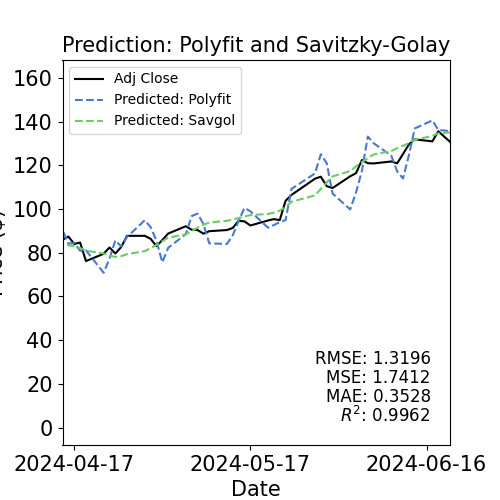

In [67]:
# Parameters for Savitzky-Golay-like fitting
window_length = 10  # Number of preceding points to use (must be less than len(data))
poly_order = 3  # Polynomial order to fit

# List to store the predicted values
predicted_values = []

# Loop through the data, starting from the point where we have enough preceding values
for i in range(window_length, len(data)):
    # Get the preceding 'window_length' values
    x = np.array(data['index'][i-window_length:i])
    y = np.array(data['Adj Close'][i-window_length:i])

    # Fit a polynomial of degree 'poly_order' to the preceding values
    coeffs = np.polyfit(x, y, poly_order)

    # Create a polynomial function from the coefficients
    poly = np.poly1d(coeffs)

    # Predict the next value (i.e., at x = data['index'][i])
    next_value = poly(data['index'][i])
    predicted_values.append(next_value)

# Add NaN values for the first 'window_length' rows since we can't predict for them
predicted_values = [np.nan] * window_length + predicted_values

# Add the predictions to the DataFrame
data['Predicted Adj Close Polyfit'] = predicted_values


# List to store the predicted values
predicted_values = []

window_length = 50

# Loop through the data, starting from the point where we have enough preceding values
for i in range(window_length, len(data)):
    # Get the preceding 'window_length' values
    x = np.array(data['index'][i-window_length:i])
    y = np.array(data['Adj Close'][i-window_length:i])

    # Generate weights: assign higher weight to more recent points
    weights = np.linspace(1, 2, window_length)  # Weights linearly increase from 1 to 2

    weights = np.exp(-0.5 * (np.linspace(-1, 0, window_length) ** 2))
    weights /= weights.sum()

    # Fit a polynomial of degree 'poly_order' to the preceding values with weights
    coeffs = np.polyfit(x, y, poly_order, w=weights)

    # Create a polynomial function from the coefficients
    poly = np.poly1d(coeffs)

    # Predict the next value (i.e., at x = data['index'][i])
    next_value = poly(data['index'][i])
    predicted_values.append(next_value)

# Add NaN values for the first 'window_length' rows since we can't predict for them
predicted_values = [np.nan] * window_length + predicted_values

# Add the predictions to the DataFrame
data['Predicted Adj Close Savgol'] = predicted_values
data['Predicted Adj Close Savgol'] = savgol_filter(data['Predicted Adj Close Savgol'], window_length=11, polyorder=2)

# Plot the original and predicted values
plt.figure(figsize=(5, 5))
plt.plot(data['Date'], data['Adj Close'], label='Adj Close', color='black')
plt.plot(data['Date'], data['Predicted Adj Close Polyfit'], label='Predicted: Polyfit', linestyle='dashed')
plt.plot(data['Date'], data['Predicted Adj Close Savgol'], label='Predicted: Savgol', linestyle='dashed')
# plt.plot(data['index'], new_y, label='Predicted Adj Close Savgol', color='green', linestyle='dashed')

r_squared = 1 - np.sum((data['Adj Close'] - data['Predicted Adj Close Savgol'])**2) / np.sum((data['Adj Close'] - np.mean(data['Adj Close']))**2)
rmse = np.sqrt(np.mean((data['Adj Close'] - data['Predicted Adj Close Savgol'])**2))
mae = np.mean(np.abs(data['Adj Close'] - data['Predicted Adj Close Savgol']))
mse = np.mean((data['Adj Close'] - data['Predicted Adj Close Savgol'])**2)


plt.text(0.95, 0.05, f'$R^2$: {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='bottom', horizontalalignment='right')
plt.text(0.95, 0.10, f'MAE: {mae:.4f}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='bottom', horizontalalignment='right')
plt.text(0.95, 0.15, f'MSE: {mse:.4f}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='bottom', horizontalalignment='right')
plt.text(0.95, 0.20, f'RMSE: {rmse:.4f}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='bottom', horizontalalignment='right')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

start_date = pd.to_datetime('2024-04-15')
end_date = pd.to_datetime('2024-06-20')
plt.xlim(start_date, end_date)


plt.xlabel('Date', fontdict={'fontsize': 15})
plt.ylabel('Price ($)', fontdict={'fontsize': 15})
plt.legend()
plt.title('Prediction: Polyfit and Savitzky-Golay', fontdict={'fontsize': 15})
plt.show()


In [54]:
# Save the data to a pickle file
with open('data_saved.pickle', 'wb') as f:
    pickle.dump(data, f)

# Load the data from the pickle file
with open('data_saved.pickle', 'rb') as f:
    data = pickle.load(f)

# Verify that the loaded data is the same as the original data
print(data.head())

   index       Date  Adj Close  Predicted Adj Close Polyfit  \
0      0 1999-01-22   0.037618                          NaN   
1      1 1999-01-25   0.041559                          NaN   
2      2 1999-01-26   0.038334                          NaN   
3      3 1999-01-27   0.038215                          NaN   
4      4 1999-01-28   0.038095                          NaN   

   Predicted Adj Close Savgol  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  


In [61]:
pd.to_datetime('2024-03-18').strftime('%Y-%m-%d')

'2024-03-18'

In [ ]:
datas.apply(lambda x: savgoliii(x['Data']), axis=1)

In [ ]:
def savgoliii(data):
# List to store the predicted values
    predicted_values = []

    # Loop through the data, starting from the point where we have enough preceding values
    for i in range(window_length, len(data)):
        # Get the preceding 'window_length' values
        x = np.array(data['index'][i-window_length:i])
        y = np.array(data['Adj Close'][i-window_length:i])

        # Generate weights: assign higher weight to more recent points
        weights = np.linspace(1, 2, window_length)  # Weights linearly increase from 1 to 2

        weights = np.exp(-0.5 * (np.linspace(-1, 0, window_length) ** 2))
        weights /= weights.sum()

        # Fit a polynomial of degree 'poly_order' to the preceding values with weights
        coeffs = np.polyfit(x, y, poly_order, w=weights)

        # Create a polynomial function from the coefficients
        poly = np.poly1d(coeffs)

        # Predict the next value (i.e., at x = data['index'][i])
        next_value = poly(data['index'][i])
        predicted_values.append(next_value)

    # Add NaN values for the first 'window_length' rows since we can't predict for them
    predicted_values = [np.nan] * window_length + predicted_values

    # Add the predictions to the DataFrame
    data['Predicted Adj Close Savgol'] = predicted_values
    data['Predicted Adj Close Savgol'] = savgol_filter(data['Predicted Adj Close Savgol'], window_length=11, polyorder=2)

    # Plot the original and predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(data['index'], data['Adj Close'], label='Actual Adj Close', color='blue')
    plt.plot(data['index'], data['Predicted Adj Close Savgol'], label='Predicted Adj Close Savgol', color='black', linestyle='dashed')
    # plt.plot(data['index'], new_y, label='Predicted Adj Close Savgol', color='green', linestyle='dashed')
    plt.xlabel('Index')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.title('Stock Price Prediction using Polynomial Fit')
    plt.show()

In [ ]:
datas.apply(savgoliii)

In [148]:
data['Predicted Adj Close Savgol Shifted'] = data['Predicted Adj Close Savgol'].shift(-1)
data['Adj Close Shifted'] = data['Adj Close'].shift(-1)
data['Predicted Adj Close Polyfit Shifted'] = data['Predicted Adj Close Polyfit'].shift(-1)

data['Savgol prediction'] = (data['Predicted Adj Close Savgol'] - data['Adj Close']).apply(lambda x: -1 if x < 0 else 1)
data['reality'] = (data['Adj Close Shifted'] - data['Adj Close']).apply(lambda x: -1 if x < 0 else 1)
data['Polyfit prediction'] = (data['Predicted Adj Close Polyfit Shifted'] - data['Adj Close']).apply(lambda x: -1 if x < 0 else 1)

print('Savgol predictions:')
print((data['reality'] == data['Savgol prediction']).value_counts(), '\n\n')

print('Polyfit predictions:')
print((data['reality'] == data['Polyfit prediction']).value_counts())

Savgol predictions:
False    2583
True     2526
Name: count, dtype: int64 


Polyfit predictions:
True     2574
False    2535
Name: count, dtype: int64


In [122]:
d = data.copy()

In [ ]:
data['Adj Close Old'] = data['Adj Close'].shift(1)
data['Predicted Adj Close Savgol Old'] = data['Predicted Adj Close Savgol'].shift(1)
data['Predicted Adj Close Polyfit Old'] = data['Predicted Adj Close Polyfit'].shift(1)

data['reality'] = (data['Adj Close'] - data['Adj Close Old']).apply(lambda x: -1 if x < 0 else 1)

data['savgol prediction (sav vs real)'] = (data['Predicted Adj Close Savgol'] - data['Adj Close Old']).apply(lambda x: -1 if x < 0 else 1)
data['polyfit prediction'] = (data['Predicted Adj Close Polyfit'] - data['Adj Close Old']).apply(lambda x: -1 if x < 0 else 1)

data['savgol prediction (sav vs sav)'] = (data['Predicted Adj Close Savgol'] - data['Predicted Adj Close Savgol Old']).apply(lambda x: -1 if x < 0 else 1)

print('Savgol (sav vs real) predictions:', end = ' ')
gg, string = (data['reality'] == data['savgol prediction (sav vs real)']).value_counts(), ''
for id in gg.index: string += f"{gg.loc[id]} {id} "
print(string)

print('Savgol (sav vs sav) predictions:', end = ' ')
gg, string = (data['reality'] == data['savgol prediction (sav vs sav)']).value_counts(), ''
for id in gg.index: string += f"{gg.loc[id]} {id} "
print(string)

print('Polyfit predictions:', end = ' ')
gg, string = (data['reality'] == data['polyfit prediction']).value_counts(), ''
for id in gg.index: string += f"{gg.loc[id]} {id} "
print(string)

Savgol (sav vs real) predictions: 2594 False 2515 True 
Savgol (sav vs sav) predictions: 2604 True 2505 False 
Polyfit predictions: 2574 True 2535 False 


In [121]:
data

,index,Date,Adj Close,Predicted Adj Close Polyfit,Predicted Adj Close Savgol
0,0,1980-12-12,0.098835,NaN,NaN
1,1,1980-12-15,0.093678,NaN,NaN
2,2,1980-12-16,0.086802,NaN,NaN
3,3,1980-12-17,0.088951,NaN,NaN
4,4,1980-12-18,0.091530,NaN,NaN
...,...,...,...,...,...
11082,11082,2024-11-27,234.929993,239.049393,235.231448
11083,11083,2024-11-29,237.330002,236.883610,237.235374
11084,11084,2024-12-02,239.589996,240.003050,239.520101
11085,11085,2024-12-03,242.649994,240.825359,242.085629


In [ ]:
#Dont run, trial
plt.figure(figsize=(10, 5))
plt.plot(data['index'], data['Adj Close'], label='Actual Adj Close', color='blue')
plt.plot(data['index'], data['Predicted Adj Close Savgol'], label='Predicted Adj Close Savgol', color='black', linestyle='dashed')
plt.plot(data['index'], data['Predicted Adj Close Polyfit Shifted'], label='Predicted Adj Close Savgol Shifted', color='red', linestyle='dashed')
plt.plot(data['index'], data['Adj Close Shifted'], label='Actual Adj Close Shifted', color='green')
plt.xlabel('Index')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.title('Stock Price Prediction using Polynomial Fit')
plt.show()

In [147]:
#Getting only valid values?
start = window_length + 5
end = -1

close = list(data['Adj Close'])[start:end]
savgol_prediction = list(data['Savgol prediction'])[start:end]
close_shifted = list(data['Adj Close Shifted'])[start:end]
reality = list(data['reality'])[start:end]
polyfit_prediction = list(data['Polyfit prediction'])[start:end]

polyfit_predicted_sum = 0
savgol_predicted_sum = 0
sum = 0

for i in range(len(close)):
    if savgol_prediction[i] == -1:
        savgol_predicted_sum += close[i] - close_shifted[i]
    else:
        savgol_predicted_sum += close_shifted[i] - close[i]

for i in range(len(close)):
    if reality[i] == -1:
        sum += close[i] - close_shifted[i]
    else:
        sum += close_shifted[i] - close[i]

for i in range(len(close)):
    if polyfit_prediction[i] == -1:
        polyfit_predicted_sum += close[i] - close_shifted[i]
    else:
        polyfit_predicted_sum += close_shifted[i] - close[i]


print(f"Savgol predicted sum: {savgol_predicted_sum}")
print(f"Polyfit predicted sum: {polyfit_predicted_sum}")
print(f"Real sum: {sum}")


Savgol predicted sum: 24.384032249450144
Polyfit predicted sum: -81.06669807434066
Real sum: -72.1009902954099


In [ ]:

print('Savgol predictions:')
print(confusion_matrix(data['reality'], data['Savgol prediction']))

print('Classification report:')
print(classification_report(data['reality'], data['Savgol prediction']))

accuracy = accuracy_score(data['reality'], data['Savgol prediction'])
precision = precision_score(data['reality'], data['Savgol prediction'], average='weighted', zero_division=0)
recall = recall_score(data['reality'], data['Savgol prediction'], average='weighted', zero_division=0)
f1 = f1_score(data['reality'], data['Savgol prediction'], average='weighted', zero_division=0)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')